In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlencode
import csv

In [56]:
url = "https://www.amazon.in/boAt-BassHeads-100-Headphones-Black/product-reviews/B071Z8M4KX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [65]:
r= requests.get(url)

In [67]:
print(r.text)

<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->

<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta http-equiv='x-dns-prefetch-control' content='on'>
<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">
<link rel="dns-prefetch" href="https://m.media-amazon.com">
<link rel="dns-prefetch" href="https://completion.amazon.com">
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->

<!-- sp:end-feature:csm:head-open-part2 -->
<!-- sp:feature:aui-assets -->
<link rel="stylesheet" href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41tGz3DNCrL.css,31ufSReDtSL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11fJbvhE5HL.css,01Dm

In [72]:
soup = BeautifulSoup(r.text, 'html.parser')

In [74]:
reviews = soup.find_all('div', {'data-hook':'review'})

In [75]:
reviews

[<div class="a-section review aok-relative" data-hook="review" id="R34CBYEN2R6PZH"><div class="a-row a-spacing-none" id="R34CBYEN2R6PZH-review-card"><div class="a-section celwidget" id="customer_review-R34CBYEN2R6PZH"><div class="a-row a-spacing-mini" data-hook="genome-widget"><a class="a-profile" data-a-size="small" href="/gp/profile/amzn1.account.AFZCMGCRKF4HR6E4TSRK7UPNVITQ"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-eu.ssl-images-amazon.com/images/S/amazon-avatars-global/default._CR0,0,1024,1024_SX48_.png"/></noscript></div></div><div class="a-profile-content"><span class="a-profile-name">Kiran Kaur</span></div></a></div><div class="a-row"><a class="a-link-normal" href="/gp/

In [93]:
print(soup.title.text)

Amazon.in:Customer reviews: boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)


In [98]:
reviewlist = []
for item in reviews:
    review = {
    'product' : soup.title.text.replace('Amazon.in:Customer reviews: ', ' ').strip(),
    'title' : item.find('a', {'data-hook': 'review-title'}).text.strip(),
    'rating' : float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace(' out of 5 stars','').strip()),
    #'rating' : float(rating.replace(' out of 5 stars','').strip()),
    'comment' : item.find('span', {'data-hook': 'review-body'}).text.strip(),
    #print(item.find('a', {'data-hook': 'review-title'}).text)
    # print(comment)
    }
    reviewlist.append(review)
    print(review)

{'product': 'boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)', 'title': 'Sound wise very good but not bass wise', 'rating': 4.0, 'comment': 'If you are looking for bass wired earphone then its not good but otherwise from sound quality its very good.'}
{'product': 'boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)', 'title': 'Nice product', 'rating': 4.0, 'comment': 'Nice product.'}
{'product': 'boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)', 'title': 'Gets the job done for the price', 'rating': 4.0, 'comment': 'the ends of the connectors are the failure points after few months of heavy usagenot recommended for serious long term use'}
{'product': 'boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)', 'title': 'Not a Great Headphone but good for the price', 'rating': 4.0, 'comment': 'Sound quality is not that good ,yet, quite good for its price'}
{'product': 'boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)', 'title': 'Worth for the 

In [81]:
rating

'4.0 out of 5 stars'

In [100]:
df = pd.DataFrame(reviewlist)
df

,product,title,rating,comment
0,boAt BassHeads 100 in-Ear Wired Headphones wit...,Sound wise very good but not bass wise,4.0,If you are looking for bass wired earphone the...
1,boAt BassHeads 100 in-Ear Wired Headphones wit...,Nice product,4.0,Nice product.
2,boAt BassHeads 100 in-Ear Wired Headphones wit...,Gets the job done for the price,4.0,the ends of the connectors are the failure poi...
3,boAt BassHeads 100 in-Ear Wired Headphones wit...,Not a Great Headphone but good for the price,4.0,"Sound quality is not that good ,yet, quite goo..."
4,boAt BassHeads 100 in-Ear Wired Headphones wit...,Worth for the price,4.0,In some phones doesn't feel good
5,boAt BassHeads 100 in-Ear Wired Headphones wit...,Nice quality go for it,4.0,Go for it I loved it
6,boAt BassHeads 100 in-Ear Wired Headphones wit...,Product Quality,4.0,the product quality is not good one of the spe...
7,boAt BassHeads 100 in-Ear Wired Headphones wit...,Good,4.0,Good
8,boAt BassHeads 100 in-Ear Wired Headphones wit...,Really great for the price,4.0,"The product was a great purchase, I have had m..."
9,boAt BassHeads 100 in-Ear Wired Headphones wit...,Good sound quality for this price range but no...,4.0,Good sound but not the best. Didn't see anythi...


In [101]:
df.to_excel('Amazon_Reviews.xlsx', index=False)

In [102]:
reviews=[comment.strip() for comment in df.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['If you are looking for bass wired earphone then its not good but otherwise from sound quality its very good.',
 'Nice product.',
 'the ends of the connectors are the failure points after few months of heavy usagenot recommended for serious long term use',
 'Sound quality is not that good ,yet, quite good for its price',
 "In some phones doesn't feel good",
 'Go for it I loved it',
 'the product quality is not good one of the speakers are not working , after 8 months of use',
 'Good',
 "The product was a great purchase, I have had mine for at least a year and half and still are working great , the sound is crisp and clear and the bass is bold but not too overwhelming, the design is easy to carry and is easy to detangle if gets tangled, comes with extra earbuds and for the price range it compares to headphones in case of soun quality. I have had this same model repurchased twice and is a valuable item , if the wire doesn't get chewed out it can last upto two to three years without any 

In [103]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

"If you are looking for bass wired earphone then its not good but otherwise from sound quality its very good. Nice product. the ends of the connectors are the failure points after few months of heavy usagenot recommended for serious long term use Sound quality is not that good ,yet, quite good for its price In some phones doesn't feel good Go for it I loved it the product quality is not good one of the speakers are not working , after 8 months of use Good The product was a great purchase, I have had mine for at least a year and half and still are working great , the sound is crisp and clear and the bass is bold but not too overwhelming, the design is easy to carry and is easy to detangle if gets tangled, comes with extra earbuds and for the price range it compares to headphones in case of soun quality. I have had this same model repurchased twice and is a valuable item , if the wire doesn't get chewed out it can last upto two to three years without any damage to the quality of sound Go

In [104]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'If you are looking for bass wired earphone then its not good but otherwise from sound quality its very good Nice product the ends of the connectors are the failure points after few months of heavy usagenot recommended for serious long term use Sound quality is not that good yet quite good for its price In some phones doesnt feel good Go for it I loved it the product quality is not good one of the speakers are not working  after 8 months of use Good The product was a great purchase I have had mine for at least a year and half and still are working great  the sound is crisp and clear and the bass is bold but not too overwhelming the design is easy to carry and is easy to detangle if gets tangled comes with extra earbuds and for the price range it compares to headphones in case of soun quality I have had this same model repurchased twice and is a valuable item  if the wire doesnt get chewed out it can last upto two to three years without any damage to the quality of sound Good sound but 

In [105]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\esati\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\esati\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['If', 'you', 'are', 'looking', 'for', 'bass', 'wired', 'earphone', 'then', 'its', 'not', 'good', 'but', 'otherwise', 'from', 'sound', 'quality', 'its', 'very', 'good', 'Nice', 'product', 'the', 'ends', 'of', 'the', 'connectors', 'are', 'the', 'failure', 'points', 'after', 'few', 'months', 'of', 'heavy', 'usagenot', 'recommended', 'for', 'serious', 'long', 'term', 'use', 'Sound', 'quality', 'is', 'not', 'that', 'good', 'yet']


In [107]:
len(text_tokens)

245

In [108]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['If', 'looking', 'bass', 'wired', 'earphone', 'good', 'otherwise', 'sound', 'quality', 'good', 'Nice', 'product', 'ends', 'connectors', 'failure', 'points', 'months', 'heavy', 'usagenot', 'recommended', 'serious', 'long', 'term', 'use', 'Sound', 'quality', 'good', 'yet', 'quite', 'good', 'price', 'In', 'phones', 'doesnt', 'feel', 'good', 'Go', 'loved', 'product', 'quality', 'good', 'one', 'speakers', 'working', '8', 'months', 'use', 'Good', 'product', 'great', 'purchase', 'mine', 'least', 'year', 'half', 'still', 'working', 'great', 'sound', 'crisp', 'clear', 'bass', 'bold', 'overwhelming', 'design', 'easy', 'carry', 'easy', 'detangle', 'gets', 'tangled', 'comes', 'extra', 'earbuds', 'price', 'range', 'compares', 'headphones', 'case', 'soun', 'quality', 'model', 'repurchased', 'twice', 'valuable', 'item', 'wire', 'doesnt', 'get', 'chewed', 'last', 'upto', 'two', 'three', 'years', 'without', 'damage', 'quality', 'sound', 'Good', 'sound', 'best', 'Didnt', 'see', 'anything', 'better', 'w

In [109]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['if', 'looking', 'bass', 'wired', 'earphone', 'good', 'otherwise', 'sound', 'quality', 'good', 'nice', 'product', 'ends', 'connectors', 'failure', 'points', 'months', 'heavy', 'usagenot', 'recommended', 'serious', 'long', 'term', 'use', 'sound', 'quality', 'good', 'yet', 'quite', 'good', 'price', 'in', 'phones', 'doesnt', 'feel', 'good', 'go', 'loved', 'product', 'quality', 'good', 'one', 'speakers', 'working', '8', 'months', 'use', 'good', 'product', 'great', 'purchase', 'mine', 'least', 'year', 'half', 'still', 'working', 'great', 'sound', 'crisp', 'clear', 'bass', 'bold', 'overwhelming', 'design', 'easy', 'carry', 'easy', 'detangle', 'gets', 'tangled', 'comes', 'extra', 'earbuds', 'price', 'range', 'compares', 'headphones', 'case', 'soun', 'quality', 'model', 'repurchased', 'twice', 'valuable', 'item', 'wire', 'doesnt', 'get', 'chewed', 'last', 'upto', 'two', 'three', 'years', 'without', 'damage', 'quality', 'sound', 'good', 'sound', 'best', 'didnt', 'see', 'anything', 'better', 'w

In [110]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['if', 'look', 'bass', 'wire', 'earphon', 'good', 'otherwis', 'sound', 'qualiti', 'good', 'nice', 'product', 'end', 'connector', 'failur', 'point', 'month', 'heavi', 'usagenot', 'recommend', 'seriou', 'long', 'term', 'use', 'sound', 'qualiti', 'good', 'yet', 'quit', 'good', 'price', 'in', 'phone', 'doesnt', 'feel', 'good', 'go', 'love', 'product', 'qualiti', 'good', 'one', 'speaker', 'work', '8', 'month', 'use', 'good', 'product', 'great', 'purchas', 'mine', 'least', 'year', 'half', 'still', 'work', 'great', 'sound', 'crisp', 'clear', 'bass', 'bold', 'overwhelm', 'design', 'easi', 'carri', 'easi', 'detangl', 'get', 'tangl', 'come', 'extra', 'earbud', 'price', 'rang', 'compar', 'headphon', 'case', 'soun', 'qualiti', 'model', 'repurchas', 'twice', 'valuabl', 'item', 'wire', 'doesnt', 'get', 'chew', 'last', 'upto', 'two', 'three', 'year', 'without', 'damag', 'qualiti', 'sound', 'good', 'sound', 'best', 'didnt', 'see', 'anyth', 'better', 'within', 'price', 'rang', 'quit', 'okay', 'seem', '

In [128]:
# Lemmatization
import en_core_web_sm
nlp = en_core_web_sm.load()
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

if looking bass wired earphone good otherwise sound quality good nice product ends connectors failure points months heavy usagenot recommended serious long term use sound quality good yet quite good price in phones doesnt feel good go loved product quality good one speakers working 8 months use good product great purchase mine least year half still working great sound crisp clear bass bold overwhelming design easy carry easy detangle gets tangled comes extra earbuds price range compares headphones case soun quality model repurchased twice valuable item wire doesnt get chewed last upto two three years without damage quality sound good sound best didnt see anything better within price range quite okay seems quite durable unlike several brands higher price ranges bought earlier all got spoiled within weeks usegoing good even 3 months rough use


In [129]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['if', 'look', 'bass', 'wire', 'earphone', 'good', 'otherwise', 'sound', 'quality', 'good', 'nice', 'product', 'end', 'connector', 'failure', 'point', 'month', 'heavy', 'usagenot', 'recommend', 'serious', 'long', 'term', 'use', 'sound', 'quality', 'good', 'yet', 'quite', 'good', 'price', 'in', 'phone', 'do', 'not', 'feel', 'good', 'go', 'love', 'product', 'quality', 'good', 'one', 'speaker', 'work', '8', 'month', 'use', 'good', 'product', 'great', 'purchase', 'mine', 'least', 'year', 'half', 'still', 'work', 'great', 'sound', 'crisp', 'clear', 'bass', 'bold', 'overwhelming', 'design', 'easy', 'carry', 'easy', 'detangle', 'gets', 'tangle', 'come', 'extra', 'earbud', 'price', 'range', 'compare', 'headphone', 'case', 'soun', 'quality', 'model', 'repurchase', 'twice', 'valuable', 'item', 'wire', 'do', 'not', 'get', 'chew', 'last', 'upto', 'two', 'three', 'year', 'without', 'damage', 'quality', 'sound', 'good', 'sound', 'good', 'do', 'not', 'see', 'anything', 'well', 'within', 'price', 'ran

In [130]:
clean_reviews=' '.join(lemmas)
clean_reviews

'if look bass wire earphone good otherwise sound quality good nice product end connector failure point month heavy usagenot recommend serious long term use sound quality good yet quite good price in phone do not feel good go love product quality good one speaker work 8 month use good product great purchase mine least year half still work great sound crisp clear bass bold overwhelming design easy carry easy detangle gets tangle come extra earbud price range compare headphone case soun quality model repurchase twice valuable item wire do not get chew last upto two three year without damage quality sound good sound good do not see anything well within price range quite okay seem quite durable unlike several brand high price range buy early all got spoil within week usegoe good even 3 month rough use'

### Feature Extaction
1. Using CountVectorizer

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [132]:
print(cv.vocabulary_)

{'if': 38, 'look': 44, 'bass': 2, 'wire': 88, 'earphone': 21, 'good': 31, 'otherwise': 53, 'sound': 71, 'quality': 60, 'nice': 49, 'product': 58, 'end': 23, 'connector': 12, 'failure': 26, 'point': 56, 'month': 48, 'heavy': 36, 'usagenot': 82, 'recommend': 63, 'serious': 68, 'long': 43, 'term': 76, 'use': 83, 'yet': 93, 'quite': 61, 'price': 57, 'in': 39, 'phone': 55, 'do': 17, 'not': 50, 'feel': 27, 'go': 30, 'love': 45, 'one': 52, 'speaker': 72, 'work': 91, 'great': 33, 'purchase': 59, 'mine': 46, 'least': 42, 'year': 92, 'half': 34, 'still': 74, 'crisp': 13, 'clear': 9, 'bold': 3, 'overwhelming': 54, 'design': 15, 'easy': 22, 'carry': 6, 'detangle': 16, 'gets': 29, 'tangle': 75, 'come': 10, 'extra': 25, 'earbud': 19, 'range': 62, 'compare': 11, 'headphone': 35, 'case': 7, 'soun': 70, 'model': 47, 'repurchase': 64, 'twice': 78, 'valuable': 85, 'item': 40, 'get': 28, 'chew': 8, 'last': 41, 'upto': 81, 'two': 79, 'three': 77, 'without': 90, 'damage': 14, 'see': 66, 'anything': 1, 'well

In [134]:
print(cv.get_feature_names())

['all', 'anything', 'bass', 'bold', 'brand', 'buy', 'carry', 'case', 'chew', 'clear', 'come', 'compare', 'connector', 'crisp', 'damage', 'design', 'detangle', 'do', 'durable', 'earbud', 'early', 'earphone', 'easy', 'end', 'even', 'extra', 'failure', 'feel', 'get', 'gets', 'go', 'good', 'got', 'great', 'half', 'headphone', 'heavy', 'high', 'if', 'in', 'item', 'last', 'least', 'long', 'look', 'love', 'mine', 'model', 'month', 'nice', 'not', 'okay', 'one', 'otherwise', 'overwhelming', 'phone', 'point', 'price', 'product', 'purchase', 'quality', 'quite', 'range', 'recommend', 'repurchase', 'rough', 'see', 'seem', 'serious', 'several', 'soun', 'sound', 'speaker', 'spoil', 'still', 'tangle', 'term', 'three', 'twice', 'two', 'unlike', 'upto', 'usagenot', 'use', 'usegoe', 'valuable', 'week', 'well', 'wire', 'within', 'without', 'work', 'year', 'yet']


In [135]:
print(reviewscv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [136]:
print(reviewscv.toarray().shape)

(137, 94)


### 2. CountVectorizer with N-grams (Bigrams & Trigrams)


In [137]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [138]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['all', 'anything', 'bass', 'bold', 'brand', 'buy', 'carry', 'case', 'chew', 'clear', 'come', 'compare', 'connector', 'crisp', 'damage', 'design', 'detangle', 'do', 'durable', 'earbud', 'early', 'earphone', 'easy', 'end', 'even', 'extra', 'failure', 'feel', 'get', 'gets', 'go', 'good', 'got', 'great', 'half', 'headphone', 'heavy', 'high', 'if', 'in', 'item', 'last', 'least', 'long', 'look', 'love', 'mine', 'model', 'month', 'nice', 'not', 'okay', 'one', 'otherwise', 'overwhelming', 'phone', 'point', 'price', 'product', 'purchase', 'quality', 'quite', 'range', 'recommend', 'repurchase', 'rough', 'see', 'seem', 'serious', 'several', 'soun', 'sound', 'speaker', 'spoil', 'still', 'tangle', 'term', 'three', 'twice', 'two', 'unlike', 'upto', 'usagenot', 'use', 'usegoe', 'valuable', 'week', 'well', 'wire', 'within', 'without', 'work', 'year', 'yet']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### 3. TF-IDF Vectorizer

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [140]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['all', 'anything', 'bass', 'bold', 'brand', 'buy', 'carry', 'case', 'chew', 'clear', 'come', 'compare', 'connector', 'crisp', 'damage', 'design', 'detangle', 'do', 'durable', 'earbud', 'early', 'earphone', 'easy', 'end', 'even', 'extra', 'failure', 'feel', 'get', 'gets', 'go', 'good', 'got', 'great', 'half', 'headphone', 'heavy', 'high', 'if', 'in', 'item', 'last', 'least', 'long', 'look', 'love', 'mine', 'model', 'month', 'nice', 'not', 'okay', 'one', 'otherwise', 'overwhelming', 'phone', 'point', 'price', 'product', 'purchase', 'quality', 'quite', 'range', 'recommend', 'repurchase', 'rough', 'see', 'seem', 'serious', 'several', 'soun', 'sound', 'speaker', 'spoil', 'still', 'tangle', 'term', 'three', 'twice', 'two', 'unlike', 'upto', 'usagenot', 'use', 'usegoe', 'valuable', 'week', 'well', 'wire', 'within', 'without', 'work', 'year', 'yet']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 

### Generate Word Cloud


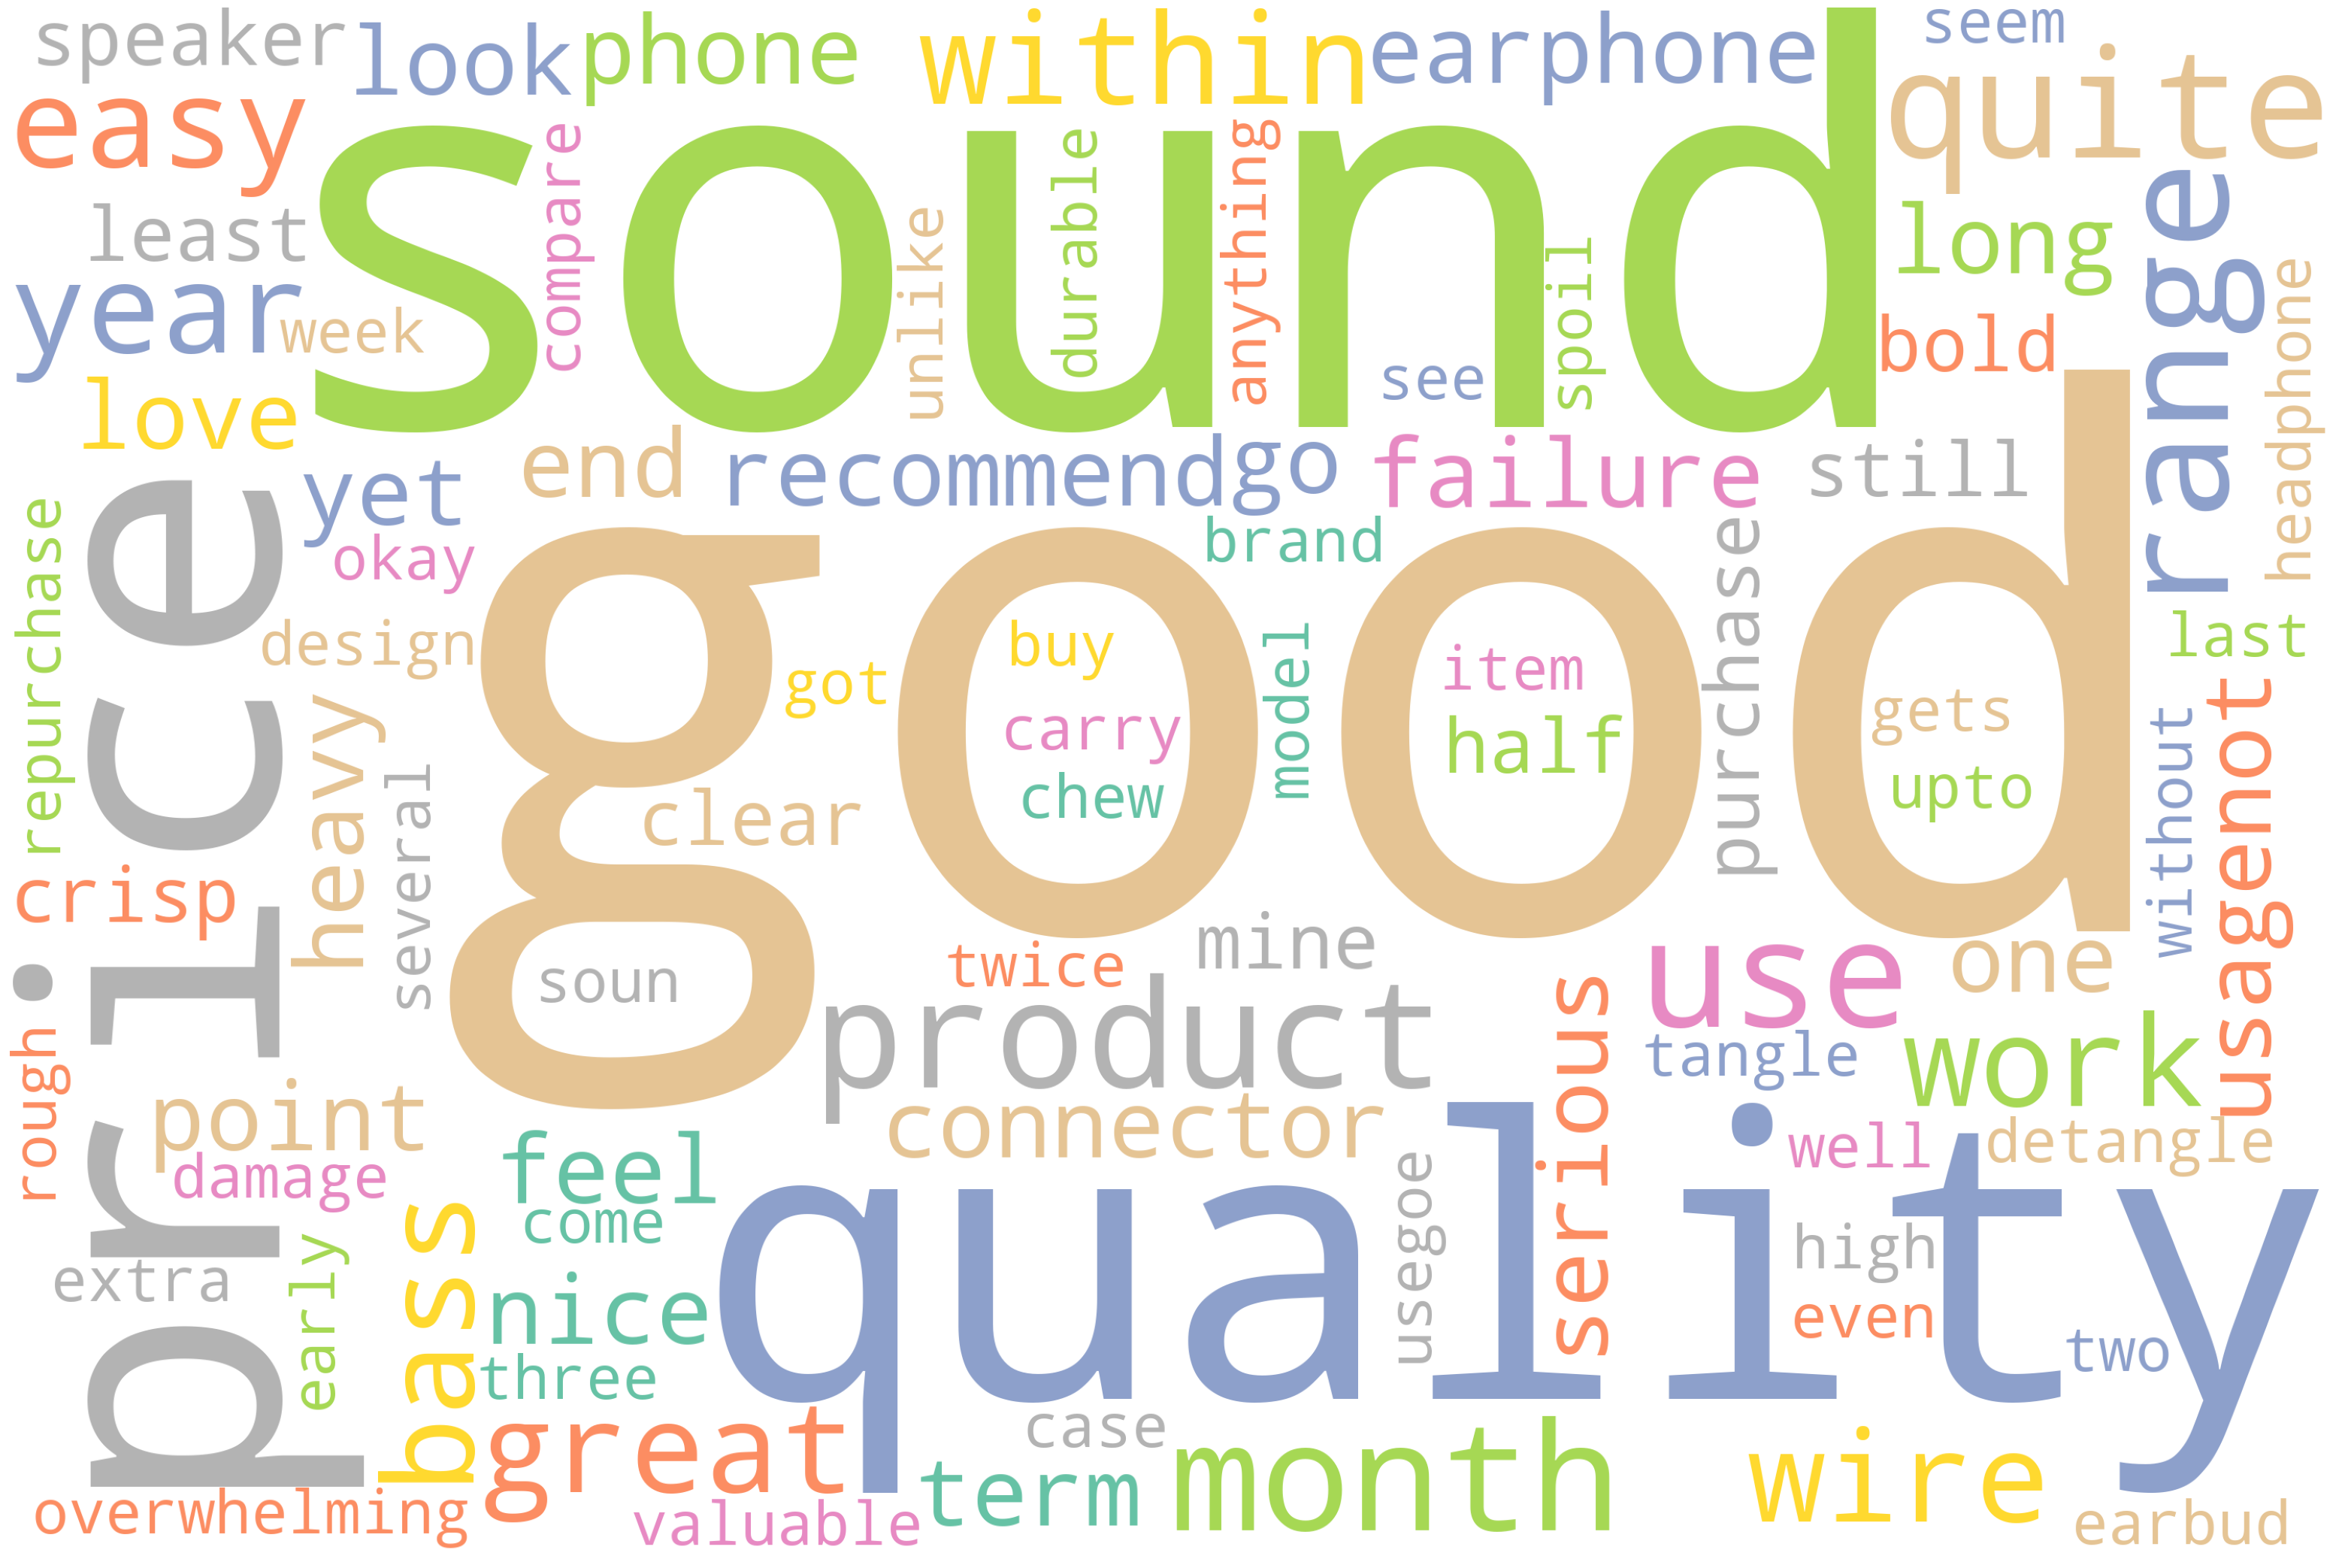

In [141]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

### Named Entity Recognition (NER)

In [142]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [143]:
for token in doc_block[100:200]:
    print(token,token.pos_)

sound NOUN
good ADJ
sound NOUN
good ADJ
do AUX
not PART
see VERB
anything PRON
well ADV
within ADP
price NOUN
range NOUN
quite ADV
okay ADV
seem VERB
quite ADV
durable ADJ
unlike ADP
several ADJ
brand NOUN
high ADJ
price NOUN
range NOUN
buy VERB
early ADV
all PRON
got VERB
spoil NOUN
within ADP
week NOUN
usegoe INTJ
good ADJ
even ADV
3 NUM
month NOUN
rough ADJ
use NOUN


In [145]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs)

['look', 'bass', 'wire', 'earphone', 'quality', 'product', 'end', 'connector', 'failure', 'point', 'month', 'usagenot', 'recommend', 'term', 'use', 'sound', 'quality', 'price', 'phone', 'feel', 'go', 'love', 'product', 'quality', 'speaker', 'work', 'month', 'use', 'product', 'purchase', 'mine', 'year', 'half', 'work', 'sound', 'bass', 'design', 'carry', 'detangle', 'gets', 'tangle', 'come', 'price', 'range', 'compare', 'headphone', 'case', 'quality', 'model', 'repurchase', 'item', 'wire', 'get', 'chew', 'upto', 'year', 'damage', 'quality', 'sound', 'sound', 'see', 'price', 'range', 'seem', 'brand', 'price', 'range', 'buy', 'got', 'spoil', 'week', 'month', 'use']


In [147]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:100] # viewing top ten results

,word,count
0,quality,5
1,sound,4
2,price,4
3,product,3
4,month,3
5,use,3
6,range,3
7,bass,2
8,wire,2
9,work,2


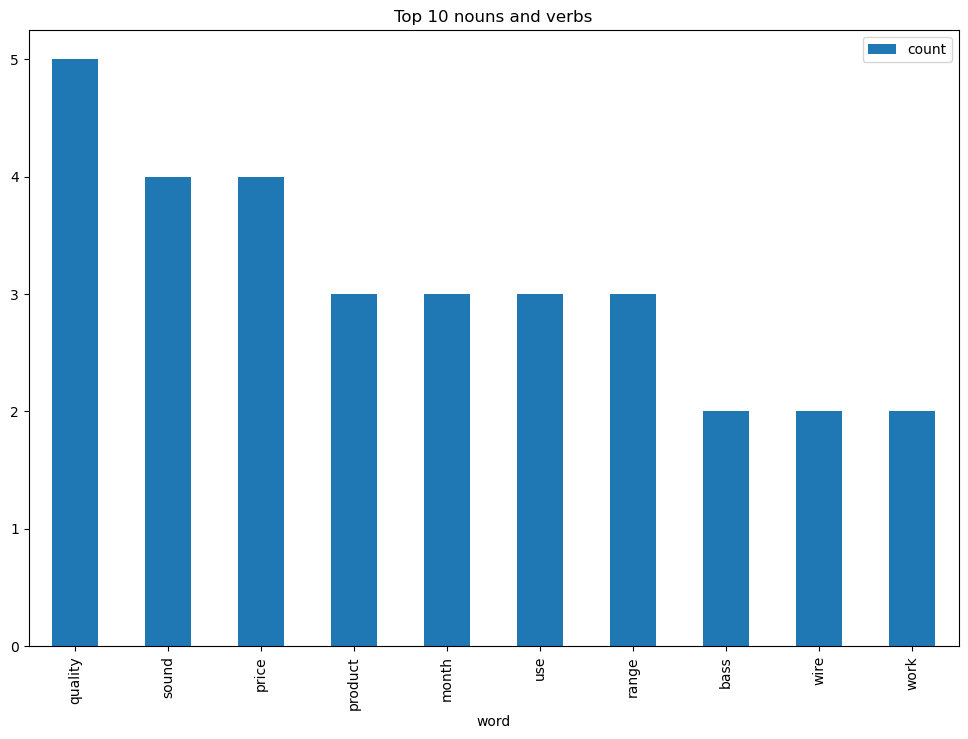

In [148]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

### Emotion Mining - Sentiment Analysis

In [149]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['If you are looking for bass wired earphone then its not good but otherwise from sound quality its very good.',
 'Nice product.',
 "the ends of the connectors are the failure points after few months of heavy usagenot recommended for serious long term use Sound quality is not that good ,yet, quite good for its price In some phones doesn't feel good Go for it I loved it the product quality is not good one of the speakers are not working , after 8 months of use Good The product was a great purchase, I have had mine for at least a year and half and still are working great , the sound is crisp and clear and the bass is bold but not too overwhelming, the design is easy to carry and is easy to detangle if gets tangled, comes with extra earbuds and for the price range it compares to headphones in case of soun quality.",
 "I have had this same model repurchased twice and is a valuable item , if the wire doesn't get chewed out it can last upto two to three years without any damage to the qualit

In [150]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,If you are looking for bass wired earphone the...
1,Nice product.
2,the ends of the connectors are the failure poi...
3,I have had this same model repurchased twice a...
4,Didn't see anything better within this price r...
5,I am quite okay with it.
6,It seems to be quite durable unlike several ot...
7,All got spoiled within few weeks of use.Going ...


In [152]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [153]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [154]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [155]:
# manual testing
calculate_sentiment(text='good service')

3

In [156]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     6
1     3
2    26
3     3
4     0
5     0
6     0
7     3
Name: sentiment_value, dtype: int64

In [157]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0     20
1      2
2    135
3     43
4      8
5      6
6     18
7     16
Name: word_count, dtype: int64

In [158]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
4,Didn't see anything better within this price r...,0,8
5,I am quite okay with it.,0,6
6,It seems to be quite durable unlike several ot...,0,18
1,Nice product.,3,2
3,I have had this same model repurchased twice a...,3,43
7,All got spoiled within few weeks of use.Going ...,3,16
0,If you are looking for bass wired earphone the...,6,20
2,the ends of the connectors are the failure poi...,26,135


In [159]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count     8.000000
mean      5.125000
std       8.692156
min       0.000000
25%       0.000000
50%       3.000000
75%       3.750000
max      26.000000
Name: sentiment_value, dtype: float64

In [160]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
4,Didn't see anything better within this price r...,0,8
5,I am quite okay with it.,0,6
6,It seems to be quite durable unlike several ot...,0,18


In [162]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,If you are looking for bass wired earphone the...,6,20
1,Nice product.,3,2
2,the ends of the connectors are the failure poi...,26,135
3,I have had this same model repurchased twice a...,3,43
7,All got spoiled within few weeks of use.Going ...,3,16


In [163]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,If you are looking for bass wired earphone the...,6,20,0
1,Nice product.,3,2,1
2,the ends of the connectors are the failure poi...,26,135,2
3,I have had this same model repurchased twice a...,3,43,3
4,Didn't see anything better within this price r...,0,8,4
5,I am quite okay with it.,0,6,5
6,It seems to be quite durable unlike several ot...,0,18,6
7,All got spoiled within few weeks of use.Going ...,3,16,7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

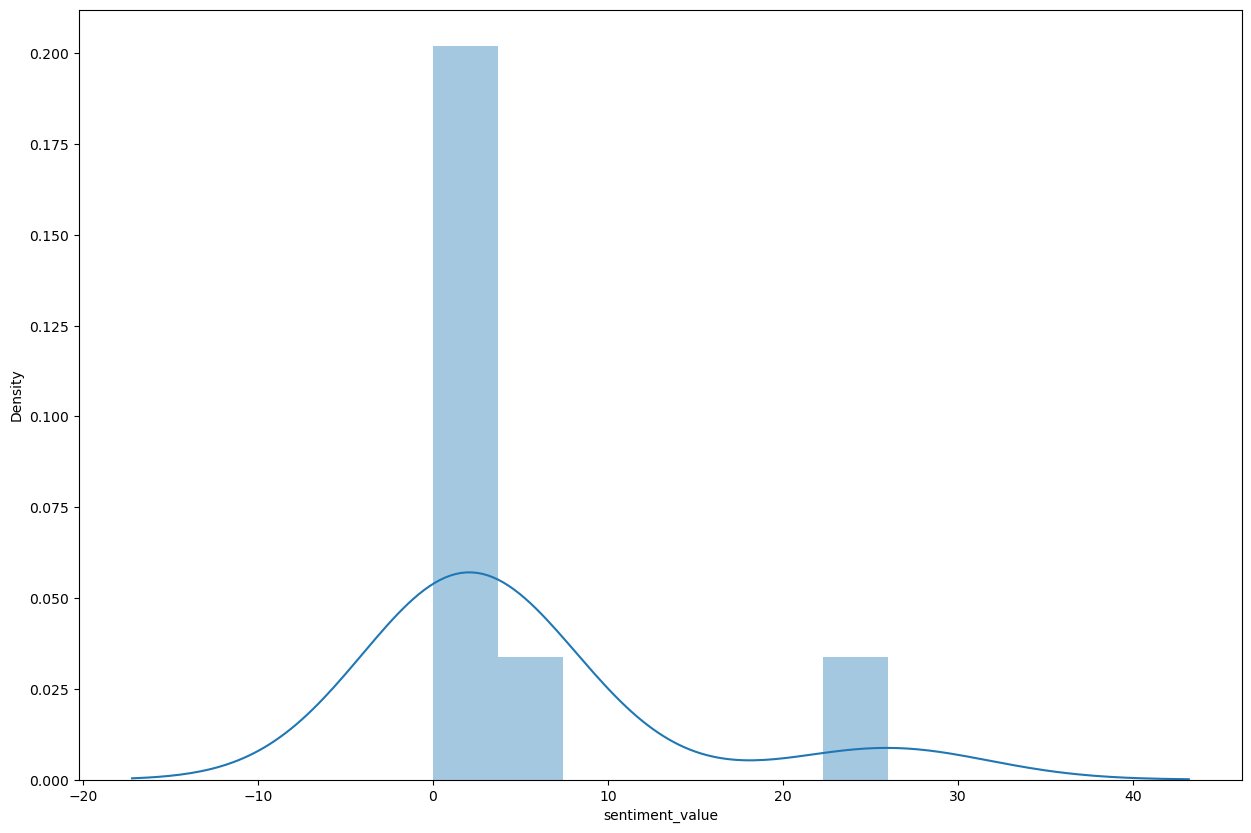

In [164]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

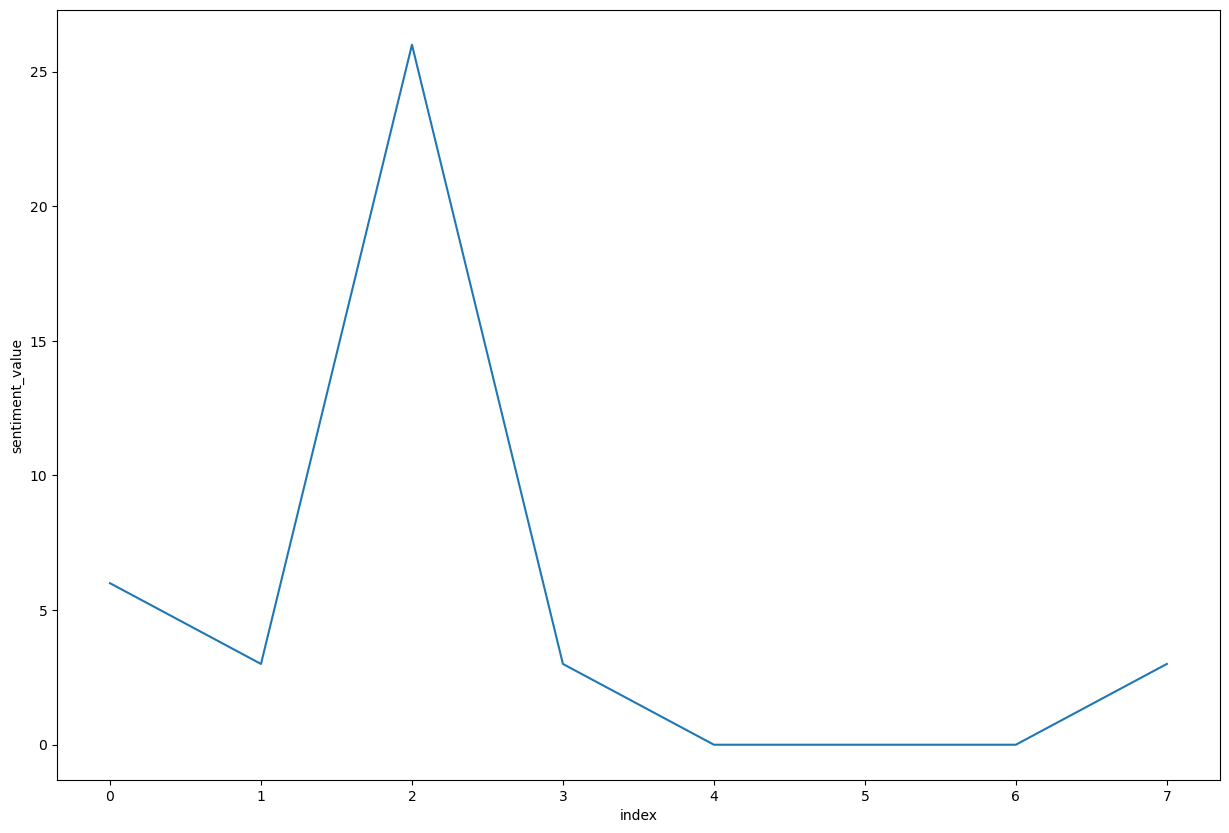

In [165]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)